<a href="https://colab.research.google.com/github/rasecotineb/datascience/blob/master/08_Visualizacion_de_datos_Visualizaci%C3%B3n_de_Series_Temporales_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Visualización de Datos</center></h1>
<h2><center>Visualización de Series Temporales en Python: Primeros Pasos<h2><center>

# 1.  Acerca del fenómeno a realizar
Desde hace muchos añs, Objetos Voladores No Identificados (OVNIs o UFOs por sus siglas en inglés) han sido vistos en los cielos de todo el planeta. Existen muchos organismos que estudian la aparición de estos objetos voladores, como por ejemplo, http://www.nuforc.org. Estas organizaciones, al igual que otras, se han encargado de almacenar información acerca de las apariciones de OVNIs y han creado repositorios de datos, algunos de libre uso.
Una de las bases de datos disponibles en Internet muestra el número de apariciones de OVNIs entre los años 1945 y 2016, la cual utilizaremos para este trabajo práctico. Estos datos muestran el número de avistamientos de OVNIs por año, entonces este es un típico problema de series temporales y la idea es, gracias a la visualización, tratar de buscar información relevante con la ayuda de nuestra “memoria explicativa”.

# 2. Visualización básica en Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Recuperar o importar un conjunto de datos que representan una serie temporal.
ufos = pd.read_csv('https://drive.google.com/uc?id=1p-dAhpFC20-fAQJ_Tqibs-zSv1fma5Qt&export=download', header=0)
#ufos = pd.read_csv('datos/ufo_sightings.csv')
ufos.head()

,year,sightings
0,1945,6
1,1946,8
2,1947,34
3,1948,8
4,1949,15


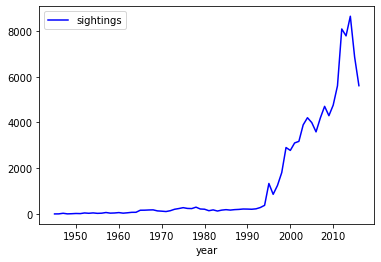

In [ ]:
#Visualizamos la serie temporal utilizando la siguiente línea
ufos.plot(x='year',y='sightings',color='blue', kind='line')
plt.show()

In [ ]:
# Visualización utilizando Seaborn
#import seaborn as sns

#plt.figure(figsize=(12,8))
#sns.set(style="whitegrid")
#sns.lineplot(x="year", y="sightings", data=ufos, label='sightings')

# 3. Visualización con Plotly

In [ ]:
#!pip install plotly --upgrade
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot  ## offline 
init_notebook_mode(connected=True)

In [ ]:
fig = go.Figure(
    data=[go.Scatter(x=ufos.year,
                     y=ufos.sightings #,hoverinfo="none" #disable hover text               
                    )]
)

fig.update_layout(
    title = "UFOS Sightings",
    xaxis = dict(title='Year'),
    yaxis = dict(title='Sightings')
)
fig.show()


In [ ]:
# obtener número máximo de avistamientos
maxValue = ufos['sightings'].max()
# obtener la posición del valor máximo de la columna sightings
maxValueIndex = ufos['sightings'].idxmax()
print(maxValue, ufos.year[maxValueIndex])

8641 2014


In [ ]:
#crear una anotación en el gráfico con el valor máximo de la celda anterior
fig.update_layout(
    annotations=[
        dict(
            x=ufos.year[maxValueIndex],
            y=maxValue,
            xref="x",
            yref="y",
            text="Max Value",
            font=dict(color = 'red'),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]
)
fig.show()

In [ ]:
import altair as alt
#alt.renderers.enable('notebook')
alt.Chart(ufos).mark_area().encode(
    alt.X('year:T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sightings:Q', stack='center', axis=None),
    alt.Color('series:N', scale=alt.Scale(scheme='category20b'))
    ).interactive()

alt.Chart(...)

# 4. Datos COVID-19
El gráfico anterior se podría ver mejor si tenemos otros ejes que permitan visualizar dos variables temporales. Para probar si esto funciona, podemos usar los datos de Covid-19 que se encuentran en PAIDEIA y así mejorar la visualización anterior, utilizandos estos datos. En este ejercicio, proponga una visualizacion que permita ver la evolución de los casos de Covid-19.

In [ ]:

#covid = pd.read_csv('datos/Covid-19_SG.csv')

covid = pd.read_csv('https://drive.google.com/uc?id=1FZX6n4Y86lwfVleg6YfxKitgbielXiE4&export=download')

#covid.head()

In [ ]:
covid.columns

Index(['Date', 'Daily Confirmed ', 'False Positives Found',
       'Cumulative Confirmed', 'Daily Discharged',
       'Passed but not due to COVID', 'Cumulative Discharged',
       'Discharged to Isolation', 'Still Hospitalised', 'Daily Deaths',
       'Cumulative Deaths', 'Tested positive demise', 'Daily Imported',
       'Daily Local transmission', 'Local cases residing in dorms MOH report',
       'Local cases not residing in doms MOH report',
       'Intensive Care Unit (ICU)', 'General Wards MOH report',
       'In Isolation MOH report', 'Total Completed Isolation MOH report',
       'Total Hospital Discharged MOH report'],
      dtype='object')

# 5. Ejercicio propuesto (para un punto en la nota de proyectos)
Inspírese en el documento aquí abajo y construya un gráfico en espiral utilizando como inspiración el artículo siguiente
https://ep.liu.se/ecp/034/013/ecp083413.pdf
Esta ejercicio vale un punto sobre la nota del trabajo final. Puede usar los datos de Ovnis o los de Covid-19